In [1]:
print("hello World!")

hello World!


In [2]:
# Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import requests
import time
import gmaps
import json
from pprint import pprint
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Import API key
from config import api_key
from config import g_key

register_matplotlib_converters()

In [3]:
# Study data files
project_path = "Project_df.csv"

# Read the csv file
Project_df = pd.read_csv(project_path)

# Display the data table for preview
Project_df

,Client ID,Town,State,Month,Quarter,Year,Category,Distributor,Min Monthly Sales,Total Sales,Compliance,Total Points,Points Worth ($)
0,2,Tlalnepantla,Ciudad de Mexico,1,1,2018,C4,D5,59000,51951,0.88,0,0.00
1,2,Tlalnepantla,Ciudad de Mexico,2,1,2018,C4,D5,59000,15301,0.26,0,0.00
2,2,Tlalnepantla,Ciudad de Mexico,5,2,2018,C4,D5,59000,19807,0.34,0,0.00
3,2,Tlalnepantla,Ciudad de Mexico,6,2,2018,C4,D5,59000,16916,0.29,0,0.00
4,2,Tlalnepantla,Ciudad de Mexico,8,3,2018,C4,D5,59000,88353,1.50,1080,928.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,1371,Colima,Colima,11,4,2020,C4,D12,59000,218149,3.70,164,141.04
14580,1371,Colima,Colima,12,4,2020,C4,D12,59000,119233,2.02,10334,8887.24
14581,1372,Tezontepec,Hidalgo,10,4,2020,C2,D15,23000,26834,1.17,172,147.92
14582,1372,Tezontepec,Hidalgo,11,4,2020,C2,D15,23000,35671,1.55,123,105.78


# Part 1 - Statistical Analysis.

####  We will use statistical analysis to understand our data

In [4]:
# Filtering the data by year to run aggregate function.
gb_year = Project_df.groupby('Year')

Project_18_df = gb_year.get_group(2018)
Project_19_df = gb_year.get_group(2019)
Project_20_df = gb_year.get_group(2020)

In [5]:
# Working with 2018 Data by Category Sales
stats_summary_2018_df = (Project_18_df.groupby("Category")["Total Sales"].agg(["min","max", "sum", "mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2018_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$266,897.00","$25,070,191.00","$19,329.37","$15,882.00","$280,700,450.39","$16,754.12",$465.21
C2,$0.00,"$883,310.00","$55,162,763.00","$32,854.53","$28,279.00","$1,099,445,958.73","$33,157.89",$809.21
C3,$319.00,"$250,064.00","$44,206,730.00","$53,197.03","$48,830.00","$883,855,335.33","$29,729.70","$1,031.31"
C4,$0.00,"$714,675.00","$55,260,572.00","$95,441.40","$86,407.00","$3,431,020,736.59","$58,574.92","$2,434.29"
C5,"$2,590.00","$471,584.00","$31,641,029.00","$140,004.55","$139,181.50","$4,078,173,565.60","$63,860.58","$4,247.94"
C6,$0.00,"$1,817,422.00","$106,768,184.00","$311,277.50","$269,100.00","$38,392,288,815.20","$195,939.50","$10,579.74"


In [6]:
# Working with 2019 Data by Category Sales
stats_summary_2019_df = (Project_19_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2019_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$128,134.00","$24,038,989.00","$16,133.55","$12,990.00","$170,505,911.32","$13,057.79",$338.28
C2,$0.00,"$494,892.00","$50,900,948.00","$28,888.17","$25,665.00","$533,468,753.33","$23,096.94",$550.24
C3,$0.00,"$276,884.00","$39,043,982.00","$52,128.15","$48,337.00","$970,088,304.31","$31,146.24","$1,138.06"
C4,$0.00,"$498,979.00","$48,892,273.00","$88,572.96","$82,104.50","$3,510,982,398.64","$59,253.54","$2,522.00"
C5,"$1,385.00","$457,897.00","$32,252,683.00","$123,573.50","$122,440.00","$5,222,577,854.33","$72,267.41","$4,473.24"
C6,$341.00,"$1,245,154.00","$102,348,571.00","$308,278.83","$260,843.00","$33,688,378,715.54","$183,543.94","$10,073.28"


In [7]:
# Working with 2020 Data by Category Sales
stats_summary_2020_df = (Project_20_df.groupby("Category")["Total Sales"].agg(["min","max", "sum","mean","median","var","std","sem"]).style.format('${0:,.2f}'))
stats_summary_2020_df

,min,max,sum,mean,median,var,std,sem
Category,,,,,,,,
C1,$0.00,"$209,363.00","$22,184,026.00","$16,780.66","$13,351.50","$234,235,777.25","$15,304.76",$420.93
C2,$0.00,"$280,652.00","$45,200,853.00","$31,854.02","$27,790.00","$551,393,157.08","$23,481.76",$623.36
C3,$688.00,"$458,634.00","$31,610,226.00","$50,902.14","$43,872.00","$1,518,277,993.29","$38,965.09","$1,563.62"
C4,$0.00,"$288,327.00","$41,579,901.00","$72,312.87","$66,679.00","$2,372,719,738.50","$48,710.57","$2,031.37"
C5,$0.00,"$437,069.00","$31,395,872.00","$130,816.13","$123,018.50","$6,809,285,103.14","$82,518.39","$5,326.54"
C6,"$25,628.00","$3,964,935.00","$104,691,580.00","$342,129.35","$269,847.50","$138,748,704,311.53","$372,489.87","$21,293.83"


# Part 2 - Analyzing Data by Number of Clients.

#### We will try to analyze if the Number of Clients has a direct impact on the Total Sales, regardless of their Category 

In [8]:
# We will create a Data Frame with the number of different clients we had for each month of the three years
clients_by_month = Project_df.groupby('Year')

client_no_18 = pd.DataFrame(clients_by_month.get_group(2018))
client_no_18 = client_no_18.groupby('Month').count()[["Client ID"]]
client_no_18 = client_no_18.values.tolist()

client_no_19 = pd.DataFrame(clients_by_month.get_group(2019))
client_no_19 = client_no_19.groupby('Month').count()[["Client ID"]]
client_no_19 = client_no_19.values.tolist()

client_no_20 = pd.DataFrame(clients_by_month.get_group(2020))
client_no_20 = client_no_20.groupby('Month').count()[["Client ID"]]
client_no_20 = client_no_20.values.tolist()

clients_number = client_no_18 + client_no_19 + client_no_20
months = list(range(1, 37))

clients_by_month = pd.DataFrame(clients_number, index = months, columns =['Number of DIfferent Clients']) 
clients_by_month.head()

,Number of DIfferent Clients
1,405
2,391
3,399
4,398
5,399


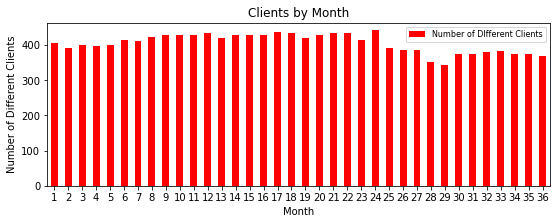

In [9]:
# Plotting that Data Frame
clients_by_month.plot(kind="bar", color="r", figsize=(9,3))

plt.title("Clients by Month")
plt.xlabel("Month")
plt.ylabel("Number of Different Clients")
plt.legend(loc=1, prop={'size': 8})
plt.xticks(rotation = 0)

plt.savefig("plots/Count of different clients by month.png")
plt.show()

In [10]:
# Analizing total sales behavior per month
grouped_sales_by_month = Project_df.groupby(['Year','Month'])
sales_df = pd.DataFrame(grouped_sales_by_month['Total Sales'].sum())
sales_df['Date']= sales_df.index
sales_df

Total Sales        Date
Year Month                         
2018 1         26947111   (2018, 1)
     2         23356058   (2018, 2)
     3         26146158   (2018, 3)
     4         24061585   (2018, 4)
     5         25665286   (2018, 5)
     6         27107108   (2018, 6)
     7         27105281   (2018, 7)
     8         26013498   (2018, 8)
     9         22760955   (2018, 9)
     10        26540217  (2018, 10)
     11        32553433  (2018, 11)
     12        29852779  (2018, 12)
2019 1         28800941   (2019, 1)
     2         24970864   (2019, 2)
     3         27123872   (2019, 3)
     4         23312343   (2019, 4)
     5         22345760   (2019, 5)
     6         22865182   (2019, 6)
     7         25114481   (2019, 7)
     8         24803959   (2019, 8)
     9         21470400   (2019, 9)
     10        24506628  (2019, 10)
     11        22976029  (2019, 11)
     12        29186987  (2019, 12)
2020 1         27305066   (2020, 1)
     2         23747293   (2020, 2)
     3         22607417   (2020, 3)
     4         13784033   (2020, 4)
     5         15486244   (2020, 5)
     6         22411630   (2020, 6)
     7         25145383   (2020, 7)
     8         25725058   (2020, 8)
     9         23045158   (2020, 9)
     10        23709608  (2020, 10)
     11        24785109  (2020, 11)
     12        28910459  (2020, 12)

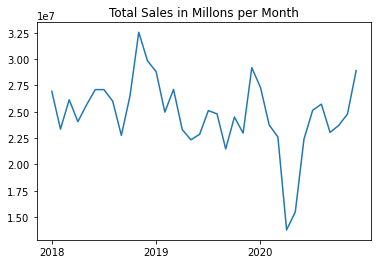

In [11]:
# Defining axes
xticks = sales_df['Total Sales'].tolist()
x_axis = np.arange(len(sales_df['Total Sales']))

# Plot the line
plt.plot(x_axis, sales_df['Total Sales'])
plt.title('Total Sales in Millons per Month')
plt.xticks(ticks=[0,12,24], labels = ['2018','2019','2020'])
plt.savefig('plots/Total sales per month.png')

plt.show()

In [12]:
# We will try to forecast the sales for the next year using an ARIMA model

# First we convert the columns we need into lists
month_list = list(range(1, 37))
sales_list = sales_df['Total Sales'].tolist()

# With those lists, we will create our Data Frame
arima_df = pd.DataFrame()
arima_df['Month'] = month_list
arima_df['Total Sales'] = sales_list
arima_df = arima_df.set_index('Month')
arima_df.head()

,Total Sales
Month,
1,26947111
2,23356058
3,26146158
4,24061585
5,25665286


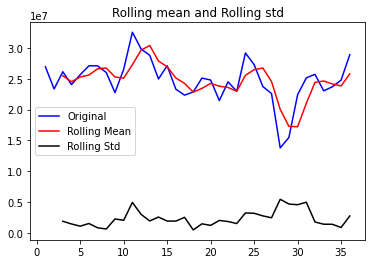

In [13]:
# We now will get the rolling mean and the rolling std and plot it with Total Sales
rolling_mean = arima_df.rolling(window = 3).mean()
rolling_std = arima_df.rolling(window = 3).std()
plt.plot(arima_df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')

plt.title('Rolling mean and Rolling std')

plt.show()

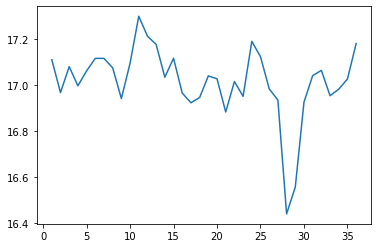

In [14]:
# Ploting the log
df_log = np.log(arima_df)
plt.plot(df_log)

In [15]:
# We will define a function that will helps us know if our time series is stationary
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and std')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Total Sales'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

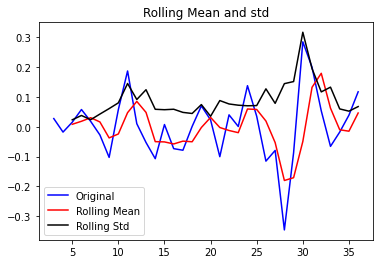

ADF Statistic: -3.4915880141524926
p-value: 0.008205778151221513
Critical Values:
	1%: -3.7377092158564813
	5%: -2.9922162731481485
	10%: -2.635746736111111


In [16]:
# We will substract the rolling mean now to render it starionaty
rolling_mean = df_log.rolling(window=3).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

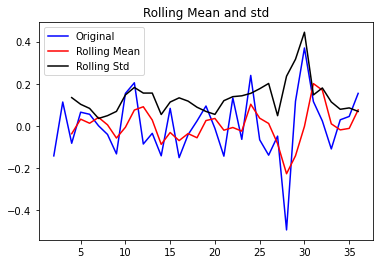

ADF Statistic: -3.5508776000415647
p-value: 0.006772644471471982
Critical Values:
	1%: -3.7238633119999998
	5%: -2.98648896
	10%: -2.6328004


In [17]:
# We will now try to substract the point that preceed any given point to look for a better solution
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


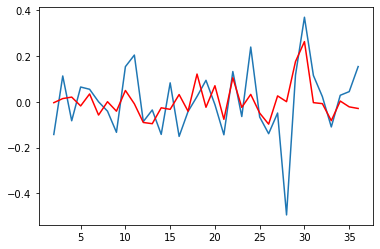

In [18]:
# We will create an Arima model with an autoregressive model
decomposition = seasonal_decompose(df_log, period=1) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

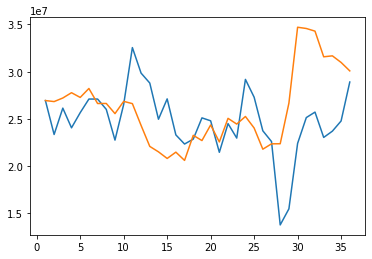

In [19]:
# We will now compare that model with our original series
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Total Sales'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(arima_df)
plt.plot(predictions_ARIMA)

C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


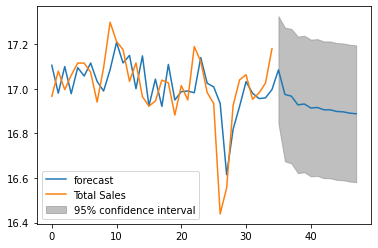

In [20]:
# Now we can predict the Total Sales for the next year
results.plot_predict(1,48)
plt.savefig('plots/ARIMA model for 12 months prediction.png')

In [21]:
# We will compare if Sales and Number of Clients hold a relation
sales_by_month = Project_df.groupby('Year')

total_sales_18 = pd.DataFrame(sales_by_month.get_group(2018))
total_sales_18 = total_sales_18.groupby('Month').sum()[["Total Sales"]]
total_sales_18 = total_sales_18.values.tolist()

total_sales_19 = pd.DataFrame(sales_by_month.get_group(2019))
total_sales_19 = total_sales_19.groupby('Month').sum()[["Total Sales"]]
total_sales_19 = total_sales_19.values.tolist()

total_sales_20 = pd.DataFrame(sales_by_month.get_group(2020))
total_sales_20 = total_sales_20.groupby('Month').sum()[["Total Sales"]]
total_sales_20 = total_sales_20.values.tolist()

total_sales_by_month = total_sales_18 + total_sales_19 + total_sales_20

total_sales = pd.DataFrame(total_sales_by_month, index = months, columns =['Total Sales'])
total_sales["Number of DIfferent Clients"] = clients_by_month["Number of DIfferent Clients"]
total_sales = total_sales.set_index("Number of DIfferent Clients")
total_sales.head()

,Total Sales
Number of DIfferent Clients,
405,26947111
391,23356058
399,26146158
398,24061585
399,25665286


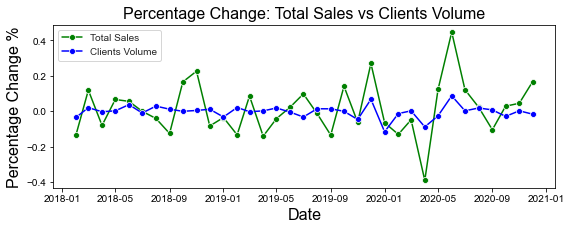

In [22]:
# Converting 'Year' and 'Month' in to a Complete Date Format (m-d-y)
date_df = Project_df[Project_df['Month']!=24]
date_df['date'] = pd.to_datetime(date_df[['Year','Month']].assign(DAY=1),format="%m-%d-%Y")

# Create a new dataframe based on the new 'date' and create the columns for the count of 'Client ID' and the sum of 'Total Sales'
pct_change_df = date_df.groupby(['date']).agg({'Client ID':'count',
                                               'Total Sales': 'sum'}).reset_index()
pct_change_df['Clients pctChange'] = pct_change_df['Client ID'].pct_change()
pct_change_df['Total Sales pctChange'] = pct_change_df['Total Sales'].pct_change()

# Create combo chart
fig, ax1 = plt.subplots(figsize = (9,3))
sns.set_style('whitegrid')

# Create lineplot for the 'Total Sales Percentage Change'
s = sns.lineplot(data=pct_change_df, x="date", y="Total Sales pctChange",
             linestyle = 'dashed', marker = 'o', color = 'green', label = 'Total Sales')

# Create lineplot for the 'Clients Volume Percentage Change'
c = sns.lineplot(data=pct_change_df, x="date", y="Clients pctChange",
             linestyle = 'dashed', marker = 'o', color = 'blue', label = 'Clients Volume')

# Set title, label and legend
plt.title('Percentage Change: Total Sales vs Clients Volume', fontsize = 16)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Percentage Change %', fontsize = 16)
plt.legend(loc='best')

plt.savefig("plots/Percentage Change Total Sales vs Clients Volume.png")
plt.show()

# Acá va la parte de Erick del histograma de maduración de ventas por cliente.

#### Acá va el data frame

#### Acá va el plot 

# Termina la parte de Erick.

# Part 3 - Analyzing Data by Category.

#### We will try to analyze Sales by Category 

In [23]:
# Sum the Total Sales by Category
category_sales_df=(pd.DataFrame(Project_df.groupby('Category')[["Total Sales","Points Worth ($)"]].sum()))

#Calculate expense ratio
#We define expense ratio as the cost of the Points Worth divided by the Total Sales
#The objective behind calculating the expense ratio is to compare all categories to see if the percentage of money returned to customer is uniform between categories or if it is different
#Higher ratios indicate more money returned to customers.

category_sales_df["ratio_expense"]=category_sales_df["Points Worth ($)"]/category_sales_df["Total Sales"]*100
category_sales_df

,Total Sales,Points Worth ($),ratio_expense
Category,,,
C1,71293206,2966554.52,4.161062
C2,151264564,4974196.14,3.288408
C3,114860938,3225996.74,2.808611
C4,145732746,4302094.96,2.952044
C5,95289584,2235232.02,2.345725
C6,313808335,6012309.02,1.915918


<IPython.core.display.Javascript object>


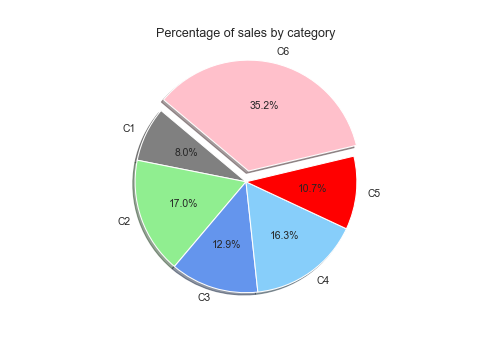

In [24]:
%matplotlib notebook
total_sales=category_sales_df["Total Sales"].sum()
sales_category=category_sales_df["Total Sales"]/total_sales*100
sales_category
names_category= ["C1","C2","C3","C4","C5","C6"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue","red", "pink"]


explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)


plt.pie(sales_category, explode=explode, labels=names_category, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of sales by category")

plt.savefig("plots/Sales percentage by category.png")
plt.show()

In [25]:
# Getting the min Monthly Sales by Category
min_sales_by_category = Project_df.drop_duplicates("Category").sort_values("Category", ascending= True)[["Category", "Min Monthly Sales"]].set_index('Category')
min_sales_by_category

,Min Monthly Sales
Category,
C1,11000
C2,23000
C3,41000
C4,59000
C5,115000
C6,183000


<IPython.core.display.Javascript object>


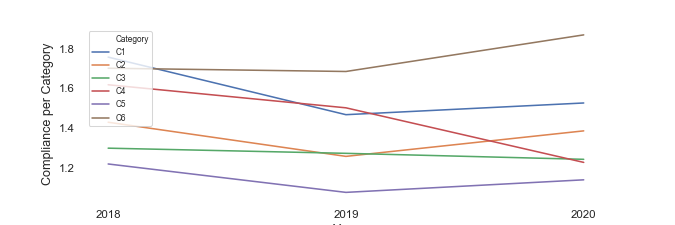

In [26]:
%matplotlib notebook
# Comparing Compliance
category_com = Project_df.groupby(['Year','Category'])['Compliance'].mean().reset_index()

# Create line char for each category
sns.set(rc={'axes.facecolor':'white'})
fig, ax1 = plt.subplots(figsize = (9,3))
g = sns.lineplot(data=category_com, x="Year", y="Compliance",hue='Category')
plt.grid(False)
plt.legend(loc=2, prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Compliance per Category')
g.set(xticks=[2018, 2019, 2020])

plt.savefig("plots/Compliance per Category.png")

plt.show()

In [27]:
# Creating Data Frames for ploting Avg Quarterly Sales vs Avg Min Monthly Sales by Category 
gb_category = Project_df.groupby('Category')

Project_c1_df = gb_category.get_group("C1")
Project_c2_df = gb_category.get_group("C2")
Project_c3_df = gb_category.get_group("C3")
Project_c4_df = gb_category.get_group("C4")
Project_c5_df = gb_category.get_group("C5")
Project_c6_df = gb_category.get_group("C6")

avgsales_vs_avgmin_c1 = Project_c1_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.reset_index()
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c1["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c1 = avgsales_vs_avgmin_c1.set_index('Quarter Number')

avgsales_vs_avgmin_c2 = Project_c2_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.reset_index()
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c2["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c2 = avgsales_vs_avgmin_c2.set_index('Quarter Number')

avgsales_vs_avgmin_c3 = Project_c3_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.reset_index()
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c3["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c3 = avgsales_vs_avgmin_c3.set_index('Quarter Number')

avgsales_vs_avgmin_c4 = Project_c4_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.reset_index()
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c4["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c4 = avgsales_vs_avgmin_c4.set_index('Quarter Number')

avgsales_vs_avgmin_c5 = Project_c5_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.reset_index()
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c5["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c5 = avgsales_vs_avgmin_c5.set_index('Quarter Number')

avgsales_vs_avgmin_c6 = Project_c6_df.groupby(['Year', 'Quarter'])
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6['Min Monthly Sales', 'Total Sales'].mean()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.reset_index()
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6[['Total Sales', 'Min Monthly Sales']]
avgsales_vs_avgmin_c6["Quarter Number"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
avgsales_vs_avgmin_c6 = avgsales_vs_avgmin_c6.set_index('Quarter Number')

C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\HP\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Indexing with multiple keys (implicitly converted t

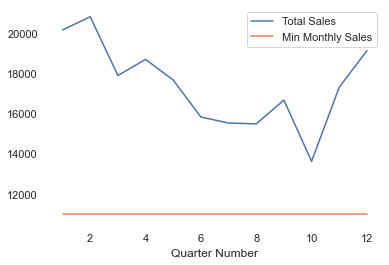

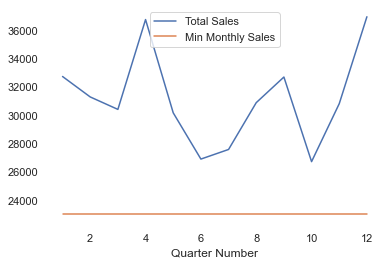

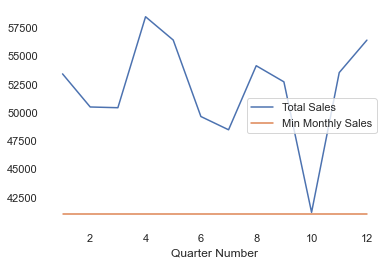

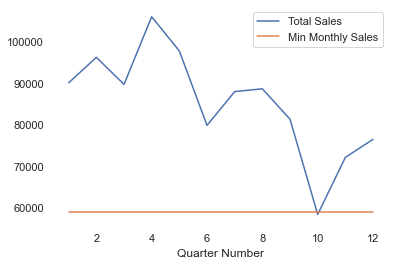

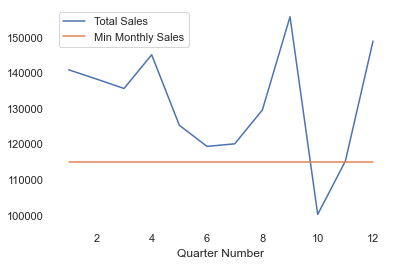

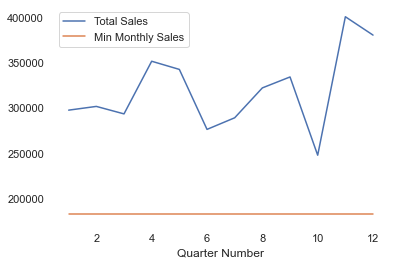

In [28]:
%matplotlib inline

avgsales_vs_avgmin_c1.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C1).png")
avgsales_vs_avgmin_c2.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C2).png")
avgsales_vs_avgmin_c3.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C3).png")
avgsales_vs_avgmin_c4.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C4).png")
avgsales_vs_avgmin_c5.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C5).png")
avgsales_vs_avgmin_c6.plot()
plt.savefig("plots/Average Sales vs Average Min Purchase (C6).png")

In [29]:
# Heatmap Compliance and Points Worth ($) per category
compliance_drop = Project_df.drop(columns =['Min Monthly Sales','Town','State','Distributor','Quarter','Compliance','Total Sales','Total Points','Client ID'])
compliance_p = compliance_drop.groupby(['Month','Year']).mean().reset_index()

# Compliance_pi = compliance_p.set_index('Year')
compliance_pi2 = compliance_p.pivot('Month','Year','Points Worth ($)')
compliance_pi2

Year,2018,2019,2020
Month,,,
1,346.953728,291.843048,298.089231
2,296.805575,249.071235,267.279065
3,5022.175840,4225.883271,4147.499275
4,286.334623,215.164382,130.375511
5,316.928321,192.043707,165.985015
6,4455.992367,3700.164828,2674.500858
7,284.980927,225.371069,314.284011
8,270.700284,240.683185,266.715118
9,4168.436112,3781.600739,3770.027240


In [30]:
compliance_drop2 = Project_df.drop(columns =['Min Monthly Sales','Town','State','Distributor','Quarter','Points Worth ($)','Total Sales','Total Points','Client ID'])
compliance_p3 = compliance_drop2.groupby(['Month','Year']).mean().reset_index()
compliance_pi4 = compliance_p3.pivot('Month','Year','Compliance')
compliance_pi4

Year,2018,2019,2020
Month,,,
1,1.587235,1.558214,1.634051
2,1.429616,1.405548,1.427714
3,1.542431,1.452687,1.276762
4,1.469095,1.344406,0.951420
5,1.504712,1.238673,1.096268
6,1.581860,1.286713,1.352091
7,1.531317,1.409739,1.526257
8,1.485142,1.324895,1.390945
9,1.265761,1.183903,1.380052


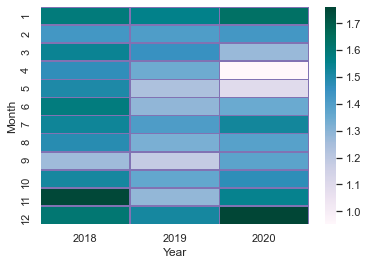

In [31]:
# Plotting the compliance
comp_hm1 = sns.heatmap(compliance_pi4,cmap="PuBuGn", linewidth=.5, linecolor ='m')

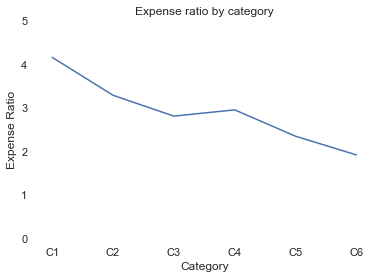

In [32]:
total_sales=category_sales_df["Total Sales"].sum()
x_axis=np.arange(0, 6, 1)
y_axis=category_sales_df["ratio_expense"]

plt.title("Expense ratio by category")
plt.xlabel("Category")
plt.ylabel("Expense Ratio")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C1","C2","C3","C4","C5","C6"], rotation="horizontal")


# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)

plt.ylim(0, 5)  
plt.grid(False)

plt.savefig("plots/Expense ratio comparison by category.png")
plt.show()

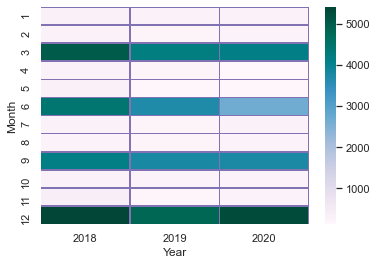

In [33]:
#Points Worth ($)
comp_hm = sns.heatmap(compliance_pi2,cmap="PuBuGn", linewidth=.5, linecolor ='m')

# Part 3 - Analyzing Data by Location.

#### We will try to analyze Sales by Client's location.

In [34]:
# We will create a States list to use it on our API/json requests
unique_locations = Project_df.drop_duplicates("State")
locations = unique_locations['State'].tolist()
locations

['Ciudad de Mexico',
 'Tabasco',
 'Chiapas',
 'Hidalgo',
 'Jalisco',
 'Guanajuato',
 'Estado de Mexico',
 'Nayarit',
 'Campeche',
 'Zacatecas',
 'Guerrero',
 'Oaxaca',
 'Sinaloa',
 'Nuevo Leon',
 'Michoacan',
 'Aguascalientes',
 'Yucatan',
 'Veracruz',
 'Puebla',
 'San Luis Potosi',
 'Queretaro',
 'Tlaxcala',
 'Morelos',
 'Tamaulipas',
 'Quintana Roo',
 'Coahuila',
 'Colima']

In [35]:
# Building the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
appid = api_key
units = "metric"
url = f"{url}appid={appid}&units={units}&q="

# Creating a list for storing information
location_info = []

# For loop
for x in locations:

    # Generating a unique URL for each location
    location_url = url + x

    # API request for each location
    try:
        location_geo = requests.get(location_url).json()
        
        # Retrieving data
        location_lat = location_geo["coord"]["lat"]
        location_lng = location_geo["coord"]["lon"]
        
        # Append the retrieved information into city_info
        location_info.append({"Location": x, 
                          "Lat": location_lat, 
                          "Lng": location_lng})

    # Exception for a not found value
    except:
        pass

In [36]:
locations_df = pd.DataFrame(unique_locations["State"]).reset_index().reset_index()
locations_df = locations_df[["level_0", "State"]]

location_info_df = pd.DataFrame(location_info).reset_index().reset_index()
location_info_df = location_info_df[["level_0", "Lat", "Lng"]]

geo_location_df = pd.merge(locations_df, location_info_df, how="outer", on=["level_0"])
geo_location_df.head()

,level_0,State,Lat,Lng
0,0,Ciudad de Mexico,19.4285,-99.1277
1,1,Tabasco,18.0000,-92.6667
2,2,Chiapas,16.5000,-92.5000
3,3,Hidalgo,20.5000,-99.0000
4,4,Jalisco,3.2541,-76.5435


In [37]:
# Merging the coordinates with each state's Total Sales
totalsales_state = Project_df.groupby("State").sum()

totalsales_state = pd.merge(totalsales_state, geo_location_df, how="outer", on=["State"])
totalsales_state = totalsales_state[["Total Sales", "Lat", "Lng"]]
totalsales_state["Total Sales"] = totalsales_state["Total Sales"].fillna(0)
totalsales_state = totalsales_state.sort_values("Total Sales", ascending= False)
totalsales_state.head()

,Total Sales,Lat,Lng
3,151778783,19.4285,-99.1277
6,119838185,19.3333,-99.5000
10,94986113,3.2541,-76.5435
7,63756184,21.0186,-101.2591
8,53652035,17.6667,-100.0000


In [38]:
# Sales heatmap
sales = totalsales_state["Total Sales"].astype(float)
maxsales = sales.max()
location_df = totalsales_state[["Lat", "Lng"]]

In [39]:
figure_layout = {'width': '1000px','height': '600px'}
gmaps.configure(api_key=g_key)
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(location_df, weights = sales, dissipating = False, max_intensity = maxsales, point_radius = 1.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='600px', width='1000px'))

### DIVIDE states by economic region:

### Mexico by region (Banxico's methodology):  (https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=2&accion=consultarCuadro&idCuadro=CR122&locale=es)
### Noth zone: Nuevo Leon, Sonora, Tamaulipas, Coahuila, Chihuahua, Baja California
### Northcentre zone: Aguascalientes, Colima, Durango, Jalisco, michoacan, Nayarit, San Luis Potosi, Sinaloa, Zacatecas, Baja California Sur
### Central zone: Mexio City, Estado de Mexico, Guanajuato, Hidalgo, Morelos, Puebla, Queretaro, Tlaxcala
### South zone: Campeche, Chiapas, Guerrero,Oaxaca, Tabasco, Veracruz, Yucatan

In [40]:
#NORTH ZONE
#COAHUILA, SONORA, TAMAULIPAS, NUEVO LEON. (NO SALES IN B.C AND CHI and sonora)

North_Zone=Project_df[(Project_df.State =="Nuevo Leon")|(Project_df.State =="Tamaulipas")
                      |(Project_df.State =="Coahuila")]

North_Zone_II=North_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
north_zone_category= North_Zone_II.groupby(['Year',"Category"]).sum()
north_zone_category["ratio_expense"]=north_zone_category["Points Worth ($)"]/north_zone_category["Total Sales"]*100
north_zone_category.head()

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            2755964        140322         120676.92       4.378755
     C2            4381837        145540         125164.40       2.856437
     C3            3531676        121669         104635.34       2.962767
     C4            5663591        221379         190385.94       3.361576
     C5            1828502         61259          52682.74       2.881197

In [41]:
# NORTH CENTRE ZONE
#AGUASCALIENTES, COLIMA, DURANGO,JALISCO,MICHOACAN,NAYARIT,SAN LUIS POTOSI, ZACATECAS, SINALOA

Northcentre_Zone=Project_df[(Project_df.State =="Aguascalientes")|(Project_df.State =="Colima")
                            |(Project_df.State =="Jalisco") | (Project_df.State == "Nayarit")
                            |(Project_df.State =="Michoacan")|(Project_df.State =="San Luis Potosi")
                            |(Project_df.State =="Sinaloa")|(Project_df.State =="Zacatecas")]
                            
Northcentre_Zone_II=Northcentre_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
northcentre_zone_category= Northcentre_Zone_II.groupby(['Year',"Category"]).sum()
northcentre_zone_category["ratio_expense"]=northcentre_zone_category["Points Worth ($)"]/northcentre_zone_category["Total Sales"]*100
northcentre_zone_category.head()

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            5155177        241994         208114.84       4.037007
     C2           12325289        523680         450364.80       3.653990
     C3           12847756        428887         368842.82       2.870873
     C4            9081269        317934         273423.24       3.010848
     C5            7089269        199237         171343.82       2.416946

In [42]:
# CENTRAL ZONE
#CIUDAD DE MEXICO, ESTADO DE MEXICO, GUANAJUATO,HIDALGO,MORELOS, PUEBLA,QUERETARO,TLAXCALA

central_Zone=Project_df[(Project_df.State =="Ciudad de Mexico")|(Project_df.State =="Estado de Mexico")
                            |(Project_df.State =="Guanajuato") | (Project_df.State == "Hidalgo")
                            |(Project_df.State =="Morelos")|(Project_df.State =="Puebla")
                            |(Project_df.State =="Queretaro")|(Project_df.State =="Tlaxcala")]

central_Zone_II=central_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
central_zone_category= central_Zone_II.groupby(['Year',"Category"]).sum()
central_zone_category["ratio_expense"]=central_zone_category["Points Worth ($)"]/central_zone_category["Total Sales"]*100
central_zone_category  .head()

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1           11678987        623874         536531.64       4.593991
     C2           28981652       1187684        1021408.24       3.524327
     C3           20926242        761810         655156.60       3.130790
     C4           31159240       1121414         964416.04       3.095121
     C5           11748046        346511         297999.46       2.536587

In [43]:
#SOUTH ZONE
#CHIAPAS,GUERRERO,OAXACA,Q.ROO, TABASCO, VERACRUZ, YUCATAN,CAMPECHE

south_Zone=Project_df[(Project_df.State =="Chiapas")|(Project_df.State =="Guerrero")
                            |(Project_df.State =="Oaxaca") | (Project_df.State == "Quintana Roo")
                            |(Project_df.State =="Tabasco")|(Project_df.State =="Veracruz")
                            |(Project_df.State =="Yucatan")|(Project_df.State =="Campeche")]

south_Zone_II=south_Zone[["Year","Category","Total Sales","Total Points","Points Worth ($)"]]
south_zone_category= south_Zone_II.groupby(['Year',"Category"]).sum()
south_zone_category["ratio_expense"]=south_zone_category["Points Worth ($)"]/south_zone_category["Total Sales"]*100
south_zone_category.head()

Total Sales  Total Points  Points Worth ($)  ratio_expense
Year Category                                                            
2018 C1            5480063        258273         222114.78       4.053143
     C2            9473985        360515         310042.90       3.272571
     C3            6901056        238697         205279.42       2.974609
     C4            9356472        330753         284447.58       3.040116
     C5           10975212        313527         269633.22       2.456747

In [44]:
NZ=North_Zone["Total Sales"].sum()
NCZ= Northcentre_Zone["Total Sales"].sum()
cZ=central_Zone["Total Sales"].sum()
sZ=south_Zone["Total Sales"].sum()
total_sales_3_years= NZ+NCZ+cZ+sZ

sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]
percentage_sales_zones={"North Zone":NZ,"North Centre Zone": NCZ,"Central zone":cZ,"South Zone":sZ}

percentage_sales_zones

{'North Zone': 48503284,
 'North Centre Zone': 211795745,
 'Central zone': 422959149,
 'South Zone': 208991195}

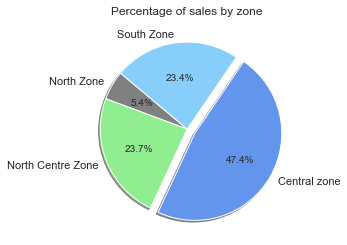

In [45]:
sales_per_zone=[NZ,NCZ,cZ,sZ]
names_zones= ["North Zone","North Centre Zone","Central zone","South Zone"]

# The colors of each section of the pie chart
colors = ["grey", "lightgreen", "cornflowerblue", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.1, 0)


plt.pie(sales_per_zone, explode=explode, labels=names_zones, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of sales by zone")

plt.savefig("plots/Percentage of sales by zone.png")
plt.show()

In [46]:
NZ_2018=North_Zone[North_Zone.Year ==2018]["Total Sales"].sum()
NZ_2019=North_Zone[North_Zone.Year ==2019]["Total Sales"].sum()
NZ_2020=North_Zone[North_Zone.Year ==2020]["Total Sales"].sum()

NCZ_2018=Northcentre_Zone[Northcentre_Zone.Year ==2018]["Total Sales"].sum()
NCZ_2019=Northcentre_Zone[Northcentre_Zone.Year ==2019]["Total Sales"].sum()
NCZ_2020=Northcentre_Zone[Northcentre_Zone.Year ==2020]["Total Sales"].sum()

cZ_2018=central_Zone[central_Zone.Year ==2018]["Total Sales"].sum()
cZ_2019=central_Zone[central_Zone.Year ==2019]["Total Sales"].sum()
cZ_2020=central_Zone[central_Zone.Year ==2020]["Total Sales"].sum()

sZ_2018=south_Zone[south_Zone.Year ==2018]["Total Sales"].sum()
sZ_2019=south_Zone[south_Zone.Year ==2019]["Total Sales"].sum()
sZ_2020=south_Zone[south_Zone.Year ==2020]["Total Sales"].sum()

<IPython.core.display.Javascript object>


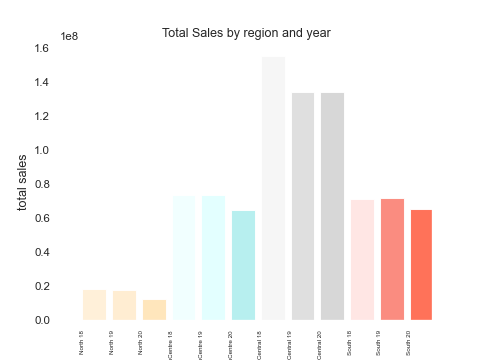

In [47]:
%matplotlib notebook

sales_byzone = [NZ_2018, NZ_2019, NZ_2020, 
                NCZ_2018, NCZ_2019,NCZ_2020,
                cZ_2018,cZ_2019,cZ_2020,
                sZ_2018,sZ_2019,sZ_2020]

x_axis = np.arange(len(sales_byzone))

plt.bar(x_axis, sales_byzone, color=['papayawhip',"blanchedalmond","moccasin","azure","lightcyan","paleturquoise","whitesmoke","gainsboro","lightgrey","mistyrose","salmon","tomato"], alpha=0.9, align="edge")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["North 18","North 19","North 20",
                            "NorthCentre 18","NorthCentre 19","NorthCentre 20",
                            "Central 18","Central 19","Central 20",
                            "South 18","South 19","South 20"], rotation="vertical", fontsize= 6)
                            

plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(sales_byzone))   
    
plt.title("Total Sales by region and year")
plt.xlabel("Zones")
plt.ylabel("total sales")

plt.savefig("plots/Total Sales by region and year.png")
plt.show()